# 随机森林
随机森林是sklearn中的一种集成算法, sklearn中的集成算法模块为ensemble, 里面有
+ AdaBoost
+ Bagging
+ ExtraTrees超树
+ GradientBoosting梯度提升
+ IsolationForest隔离森林
+ RandomForest随机森林
+ RandomTreesEmbedding完全随机树
+ Voting用于不合适估算其的软投票/多数规则分类器

参数n_estimators: 表示基评估器的个数, 简单来说就是集成了多少种不同的评估方法, 一般来说越大效果越好

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split


In [16]:
wine = load_wine()
wine.get('data').shape[1]

13

In [17]:
feature_data = wine.get('data')
label_data = wine.get('target')
X = pd.DataFrame(feature_data, columns=[f'x_{i}' for i in range(feature_data.shape[1])])
Y = pd.DataFrame(label_data, columns=['y'])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
random_forest_classifier = RandomForestClassifier(random_state=0, n_estimators=25)

In [18]:
decision_tree_classifier = decision_tree_classifier.fit(x_train, y_train)
random_forest_classifier = random_forest_classifier.fit(x_train, y_train)

C:\Users\24563\AppData\Local\Temp/ipykernel_22000/2205503258.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_classifier = random_forest_classifier.fit(x_train, y_train)


In [19]:
tree_classifier_score = decision_tree_classifier.score(x_test, y_test)
forest_classifier_score = random_forest_classifier.score(x_test, y_test)

In [20]:
print(tree_classifier_score)
print(forest_classifier_score)

0.8703703703703703
0.9629629629629629


In [21]:
import graphviz
from sklearn import tree

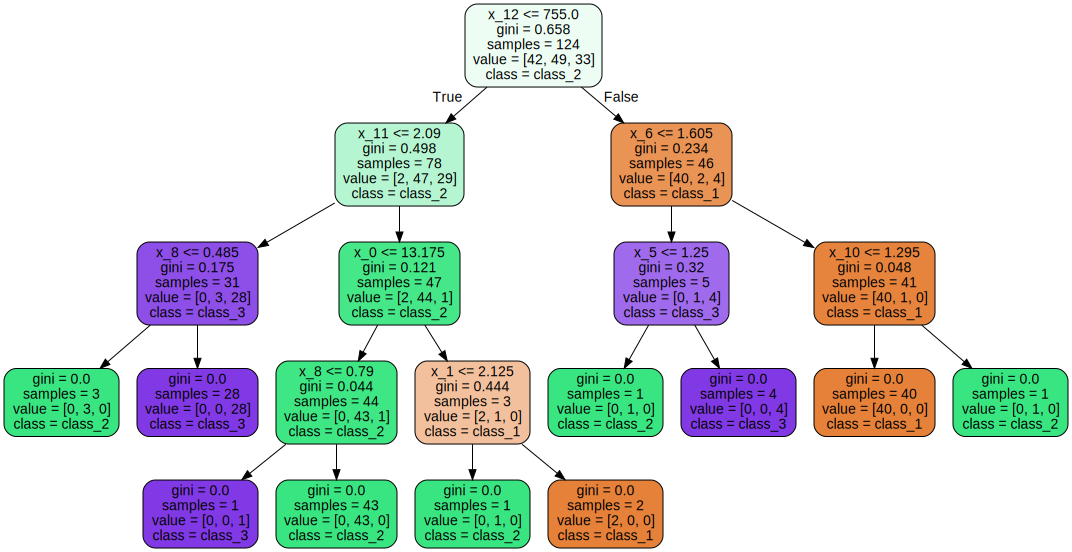

In [24]:
dot_data = tree.export_graphviz(decision_tree_classifier,
                                # 决策树分类的依据
                                feature_names=X.columns,
                                # class_names属性: 分类的名称
                                class_names=['class_1', 'class_2', 'class_3'],
                                # filled属性: 决策树中通过不同的颜色来区分不同的类别
                                filled=True,
                                rounded=True)
graph = graphviz.Source(dot_data)
graph

## 多次测试

In [25]:
import matplotlib.pyplot as plt


C:\Users\24563\AppData\Local\Temp/ipykernel_22000/3616142888.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train, y_train)
C:\Users\24563\AppData\Local\Temp/ipykernel_22000/3616142888.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train, y_train)
C:\Users\24563\AppData\Local\Temp/ipykernel_22000/3616142888.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train, y_train)
C:\Users\24563\AppData\Local\Temp/ipykernel_22000/3616142888.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel()

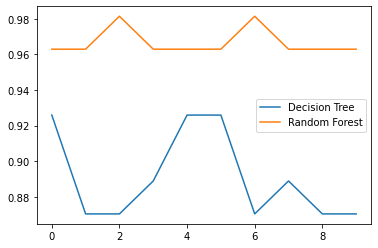

In [28]:
def my_fit(models):
    result = []
    for model in models:
        model = model.fit(x_train, y_train)
        result.append(model.score(x_test, y_test))
    return result


dtc_values = []
rfc_values = []
COUNTS = 10
for i in range(COUNTS):
    rfc = RandomForestClassifier()
    dtc = DecisionTreeClassifier()
    dtc_value, rfc_value = my_fit([dtc, rfc])
    dtc_values.append(dtc_value)
    rfc_values.append(rfc_value)
plt.plot(range(COUNTS), dtc_values, label = "Decision Tree")
plt.plot(range(COUNTS), rfc_values, label = "Random Forest")
plt.legend()
plt.show()